<a href="https://colab.research.google.com/github/FaragoFa/Emociones/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Faragó Facundo - Gustavo Doctorovich

# **Cargar repositorio**

In [ ]:
! git clone https://github.com/FaragoFa/Proyecto.git

fatal: destination path 'Proyecto' already exists and is not an empty directory.


# **Importar librerias y dataset**

In [ ]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend


# Ruta al archivo de texto con los datos de los sujetos
ruta_archivo = '/content/Proyecto/datasets/netmats2.txt'

# Ruta al archivo de texto con los time series
ruta_archivots = '/content/Proyecto/datasets/100206.txt'

# Cargar los datos de los sujetos desde el archivo de texto
datos_sujetos = np.loadtxt(ruta_archivo)

# Reshape para crear una matriz 3D (1003, 25, 25)
matrices_por_sujeto = datos_sujetos.reshape((1003, 25, 25))

# Cargar los datos timeseries de los sujetos desde el archivo de texto
datos_ts = np.loadtxt(ruta_archivots)

# Reshape para crear una matriz 2D (4800, 25)
matriz_ts = datos_ts.reshape((4800, 25))

# **Resultados**

## Matriz de conectividad

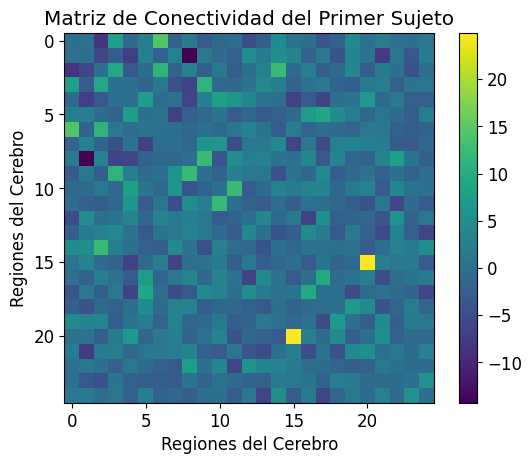

In [ ]:
# Seleccionar una sola matriz de conectividad (por ejemplo, la primera)
matriz_conectividad_individual = matrices_por_sujeto[0]

# Crear la visualización de la matriz de conectividad individual
plt.imshow(matriz_conectividad_individual, cmap='viridis', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Conectividad del Primer Sujeto')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

## Matriz promedio de matrices de conectividad

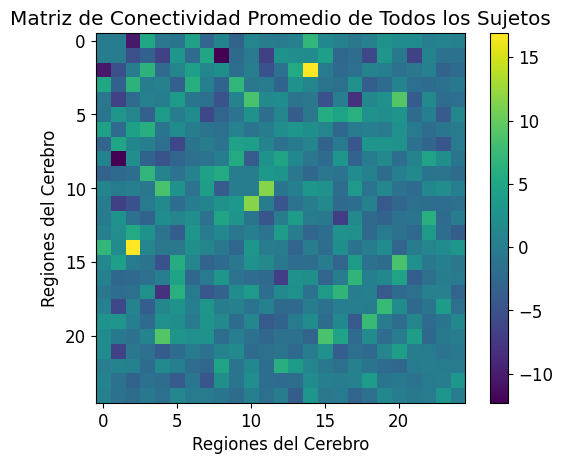

In [ ]:
# Calcular la matriz de conectividad promedio de todos los sujetos
matriz_conectividad_promedio = np.mean(matrices_por_sujeto, axis=0)

# Visualizar la matriz de conectividad promedio
plt.imshow(matriz_conectividad_promedio, cmap='viridis', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Conectividad Promedio de Todos los Sujetos')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

## fRMI

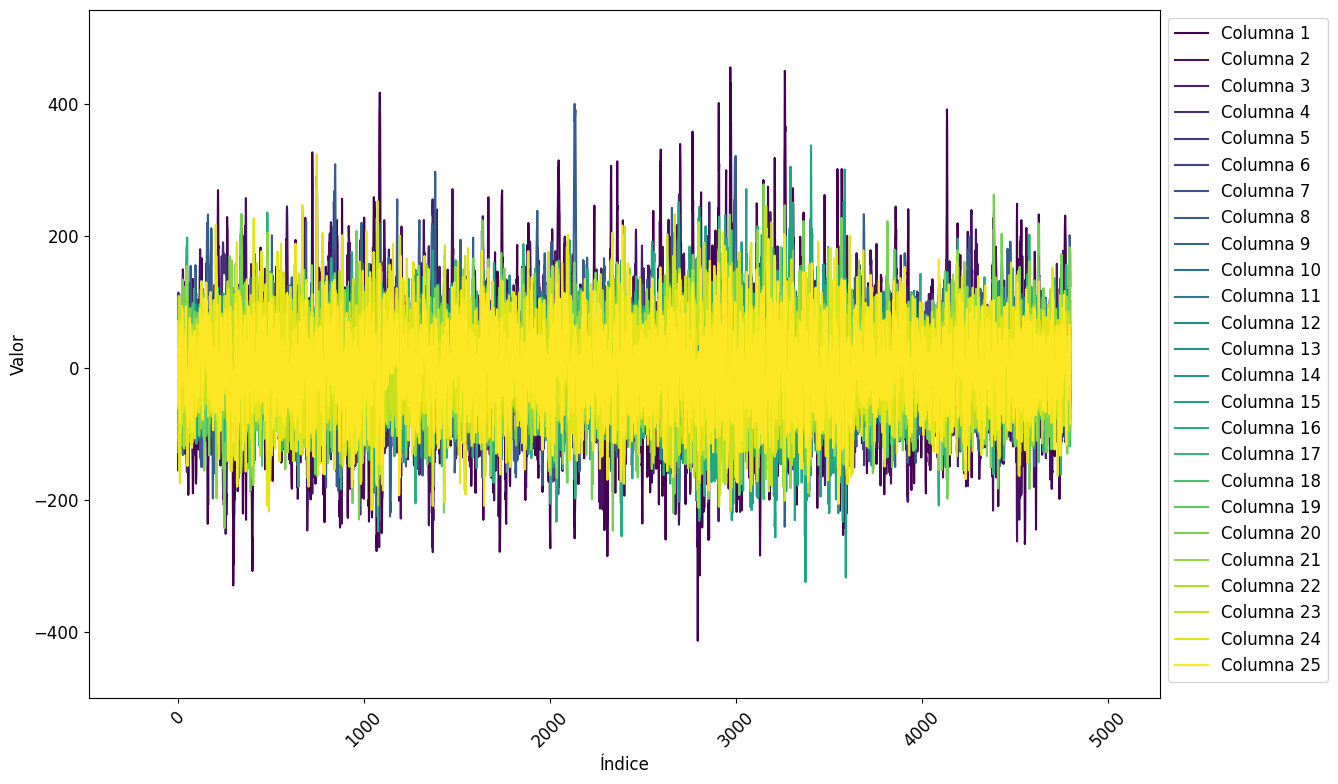

In [ ]:
# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

# Crear un gráfico con un tamaño más grande
plt.figure(figsize=(12, 8))

# Obtener el número de columnas y generar colores únicos para cada una de las regiones
num_columnas = matrizrp_detrended.shape[1]
colores = plt.cm.viridis(np.linspace(0, 1, num_columnas))

# Iterar sobre cada columna de la matriz y graficarla como una curva con un color distinto cada región
for i in range(num_columnas):
    plt.plot(matrizrp_detrended[:, i], color=colores[i], label=f'Columna {i+1}')

# Agregar etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')

# Ajustar el tamaño de la fuente
plt.rcParams['font.size'] = 12

# Rotar las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=45)

# Mejorar la disposición del gráfico
plt.tight_layout()

# Ajustar la posición de la leyenda fuera del área del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar los márgenes del gráfico
plt.margins(x=0.1, y=0.1)

# Mostrar el gráfico
plt.show()

## Correlacion (fMRI)

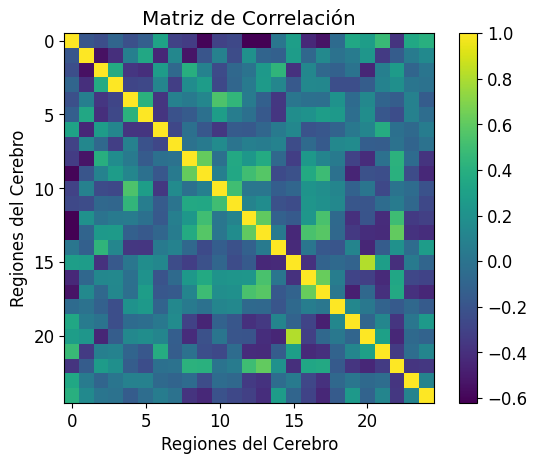

In [ ]:
# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

matriz_correlacion = np.corrcoef(matrizrp_detrended, rowvar=False)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(matriz_correlacion, cmap='viridis', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Correlación')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')


# Mostrar la visualización
plt.show()
